In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import igraph as ig
import numpy as np
import pandas as pd
import src.analysis.robustness_testing as rt
import src.analysis.community_aware_centrality as cac
from src.visualization import visualize

# import matplotlib.pyplot as plt
# %matplotlib inline

In [3]:
g = ig.Graph.Read_Picklez('../data/processed/roadnet-PA.pkl.gz')
part = g.community_leiden(objective_function='modularity')

In [4]:
centralities = [cac.modularity_vitality,
                cac.absolute_modularity_vitality,
                cac.adjusted_modular_centrality_degree,
                cac.masuda,
                cac.community_hub_bridge,
                cac.weighted_modular_centrality_degree,
                cac.degree]

In [5]:
abbreviations = {'modularity_vitality': 'MV',
                'absolute_modularity_vitality': 'AMV',
                'adjusted_modular_centrality_degree': 'AMC-D',
                'masuda': 'Mas',
                'community_hub_bridge': 'CHB',
                'weighted_modular_centrality_degree': 'WMC-D',
                'degree': 'Deg'}

In [6]:
sigma_results = {}
value_results = {}
for centrality_func in centralities:
    values, rho, sigma, rho_e = rt.initial_attack(g, part, centrality_func,
                                                 calculations=100)
    sigma_results[centrality_func.__name__] = [rho, sigma, rho_e]
    value_results[centrality_func.__name__] = values
    print(f'finished {centrality_func.__name__}')

finished modularity_vitality
finished absolute_modularity_vitality
finished adjusted_modular_centrality_degree
finished masuda
finished community_hub_bridge
finished weighted_modular_centrality_degree
finished degree


In [7]:
for function, (rho, sigma, rho_e) in sigma_results.items():
    node_cost = np.trapz(y=sigma, x=rho)
    edge_cost = np.trapz(y=sigma, x=rho_e)
    print(f'{abbreviations[function]}:')
    print(f'node cost: {node_cost}, edge cost: {edge_cost}')

MV:
node cost: 0.015281932909430347, edge cost: 0.024938223185358065
AMV:
node cost: 0.018392537343791933, edge cost: 0.03066059244424471
AMC-D:
node cost: 0.018032644166534915, edge cost: 0.034151141923508564
Mas:
node cost: 0.010519686852740922, edge cost: 0.019623533950388246
CHB:
node cost: 0.14934047352122343, edge cost: 0.26268982318866024
WMC-D:
node cost: 0.10817150790536277, edge cost: 0.23823846471823948
Deg:
node cost: 0.12177340785443869, edge cost: 0.30533318452350316


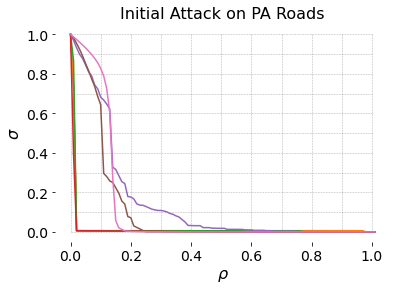

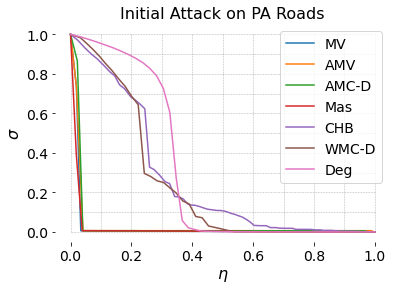

In [8]:
visualize.fragFigs('PA Roads', sigma_results, abbrv=abbreviations, legend=True)

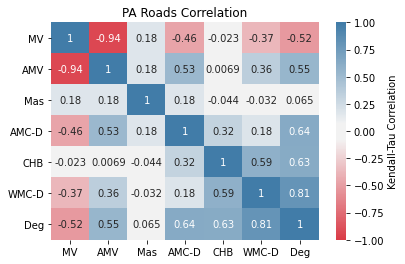

In [9]:
visualize.heatmap('PA Roads', value_results, abbrv=abbreviations)